# Project: Investigate a Dataset
## Investigation of the Soccer Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This investigation uses the football dataset provided through this link: (https://www.kaggle.com/datasets/hugomathien/soccer). The perspective taken was that of analysing the creative attributes of the teams that win championships. The English Premier League was selected as the focus with the period of 2009 to 2015.

> The pandas documentation was utilized for reference (https://pandas.pydata.org/docs/)

In [24]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
# import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [25]:
# Loading the relevant files
df_T = pd.read_csv('Team.csv')
df_TA = pd.read_csv('Team_Attributes.csv')
  
# Creating a dataframe join
df = pd.merge(df_T, df_TA, on='team_api_id', how='left')

In [26]:
# Verify that result of SQL query is stored in the dataframe
df.head()

,id_x,team_api_id,team_fifa_api_id_x,team_long_name,team_short_name,id_y,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,485.0,673.0,2010-02-22 00:00:00,45.0,Balanced,...,60.0,Normal,Organised,70.0,High,65.0,Press,70.0,Wide,Cover
1,1,9987,673.0,KRC Genk,GEN,486.0,673.0,2011-02-22 00:00:00,66.0,Balanced,...,51.0,Normal,Organised,48.0,Medium,47.0,Press,54.0,Normal,Offside Trap
2,1,9987,673.0,KRC Genk,GEN,487.0,673.0,2012-02-22 00:00:00,53.0,Balanced,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
3,1,9987,673.0,KRC Genk,GEN,488.0,673.0,2013-09-20 00:00:00,58.0,Balanced,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
4,1,9987,673.0,KRC Genk,GEN,489.0,673.0,2014-09-19 00:00:00,58.0,Balanced,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover


In [27]:
# Shape of the data
df.shape

(1469, 29)

In [28]:
# Description of the data
df.describe()

,id_x,team_api_id,team_fifa_api_id_x,id_y,team_fifa_api_id_y,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1469.000000,1469.000000,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,22750.390061,10213.878829,17706.982167,729.500000,17706.982167,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,15032.343553,14675.457811,39179.857739,421.032659,39179.857739,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1601.000000,1.000000,1.000000,1.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,9548.000000,8456.000000,110.000000,365.250000,110.000000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,20525.000000,8674.000000,485.000000,729.500000,485.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,35295.000000,9904.000000,1900.000000,1093.750000,1900.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,51606.000000,274581.000000,112513.000000,1458.000000,112513.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [29]:
# View the index number and label for each column
for i, v in enumerate(df.columns):
    print(i, v)

0 id_x
1 team_api_id
2 team_fifa_api_id_x
3 team_long_name
4 team_short_name
5 id_y
6 team_fifa_api_id_y
7 date
8 buildUpPlaySpeed
9 buildUpPlaySpeedClass
10 buildUpPlayDribbling
11 buildUpPlayDribblingClass
12 buildUpPlayPassing
13 buildUpPlayPassingClass
14 buildUpPlayPositioningClass
15 chanceCreationPassing
16 chanceCreationPassingClass
17 chanceCreationCrossing
18 chanceCreationCrossingClass
19 chanceCreationShooting
20 chanceCreationShootingClass
21 chanceCreationPositioningClass
22 defencePressure
23 defencePressureClass
24 defenceAggression
25 defenceAggressionClass
26 defenceTeamWidth
27 defenceTeamWidthClass
28 defenceDefenderLineClass


### Data Cleaning

In [30]:
# Check for duplicates
sum(df.duplicated())

0

In [31]:
# creation of the attributes dataframe
df_A = df.iloc[:, np.r_[1:4,7,8,15,17,19]]
df_A.head()

,team_api_id,team_fifa_api_id_x,team_long_name,date,buildUpPlaySpeed,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting
0,9987,673.0,KRC Genk,2010-02-22 00:00:00,45.0,50.0,35.0,60.0
1,9987,673.0,KRC Genk,2011-02-22 00:00:00,66.0,65.0,66.0,51.0
2,9987,673.0,KRC Genk,2012-02-22 00:00:00,53.0,55.0,48.0,56.0
3,9987,673.0,KRC Genk,2013-09-20 00:00:00,58.0,67.0,48.0,56.0
4,9987,673.0,KRC Genk,2014-09-19 00:00:00,58.0,67.0,48.0,56.0


In [32]:
# save this for later
df_A.to_csv('football_dataset_creativity.csv', index=False)

In [33]:
df_fdc = pd.read_csv('football_dataset_creativity.csv')
df_fdc.head()

,team_api_id,team_fifa_api_id_x,team_long_name,date,buildUpPlaySpeed,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting
0,9987,673.0,KRC Genk,2010-02-22 00:00:00,45.0,50.0,35.0,60.0
1,9987,673.0,KRC Genk,2011-02-22 00:00:00,66.0,65.0,66.0,51.0
2,9987,673.0,KRC Genk,2012-02-22 00:00:00,53.0,55.0,48.0,56.0
3,9987,673.0,KRC Genk,2013-09-20 00:00:00,58.0,67.0,48.0,56.0
4,9987,673.0,KRC Genk,2014-09-19 00:00:00,58.0,67.0,48.0,56.0


In [34]:
# Description of the data
df_fdc.describe()

,team_api_id,team_fifa_api_id_x,buildUpPlaySpeed,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting
count,1469.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,10213.878829,17706.982167,52.462277,52.165295,53.731824,53.969136
std,14675.457811,39179.857739,11.545869,10.360793,11.086796,10.327566
min,1601.000000,1.000000,20.000000,21.000000,20.000000,22.000000
25%,8456.000000,110.000000,45.000000,46.000000,47.000000,48.000000
50%,8674.000000,485.000000,52.000000,52.000000,53.000000,53.000000
75%,9904.000000,1900.000000,62.000000,59.000000,62.000000,61.000000
max,274581.000000,112513.000000,80.000000,80.000000,80.000000,80.000000


In [35]:
# Info of the data
df_fdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   team_api_id             1469 non-null   int64  
 1   team_fifa_api_id_x      1458 non-null   float64
 2   team_long_name          1469 non-null   object 
 3   date                    1458 non-null   object 
 4   buildUpPlaySpeed        1458 non-null   float64
 5   chanceCreationPassing   1458 non-null   float64
 6   chanceCreationCrossing  1458 non-null   float64
 7   chanceCreationShooting  1458 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 91.9+ KB


In [36]:
# Operations on the data
# Rename the columns
df_fdc.rename(columns = {'team_long_name':'team_name', 'team_fifa_api_id_x':'fifa_id', 'team_api_id':'team_id'}, inplace = True)
# Truncate the date column for the plot
df_fdc['date'] = df_fdc['date'].str[:4]
# View the index number and label for each column
for i, v in enumerate(df_fdc.columns):
    print(i, v)

0 team_id
1 fifa_id
2 team_name
3 date
4 buildUpPlaySpeed
5 chanceCreationPassing
6 chanceCreationCrossing
7 chanceCreationShooting


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Are premier league winning teams characterized primarily by creativity, team cohesion and fluidity?

###### A comparitive analysis on the EPL Champions between 2009 and 2015
###### Team Attributes being compared:
> 1. Build up play speed
> 2. Chance creation (passing)
> 3. Chance creation (crossing)
> 4. Chance creation (shooting)

In [37]:
df_Chelsea = df_fdc[df_fdc["team_name"] == "Chelsea"]
df_M_United = df_fdc[df_fdc["team_name"] == "Manchester United"]
df_M_City = df_fdc[df_fdc["team_name"] == "Manchester City"]

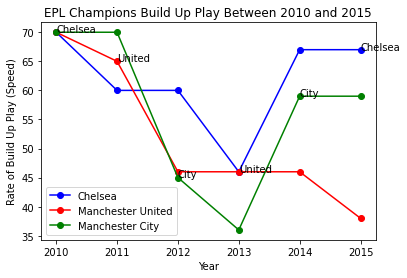

In [38]:
# plot distribution of build up play Speed
x1 = df_Chelsea['date']
x2 = df_M_United['date']
x3 = df_M_City['date']

y1 = df_Chelsea['buildUpPlaySpeed']
y2 = df_M_United['buildUpPlaySpeed']
y3 = df_M_City['buildUpPlaySpeed']

plt.title('EPL Champions Build Up Play Between 2010 and 2015')
plt.xlabel('Year')
plt.ylabel('Rate of Build Up Play (Speed)')

Chelsea, = plt.plot(x1, y1, label="Chelsea", marker='o', color='blue')
M_United, = plt.plot(x2, y2, label="Manchester United", marker='o', color='red')
M_City, = plt.plot(x3, y3, label="Manchester City", marker='o', color='green')

#Champion Label
plt.text(0,70,'Chelsea')
plt.text(1,65,'United')
plt.text(2,45,'City')
plt.text(3,46,'United')
plt.text(4,59,'City')
plt.text(5,67,'Chelsea')


leg = plt.legend(loc='lower left')
plt.show()

> Based on the results from the chart of build up play speed, we may conclude that our initial question does not always fit as in the 2011, 2012 and 2014, the EPL champions were not as direct in their build up play compared to the other two teams that were frequent winners within the period of 2010 to 2015

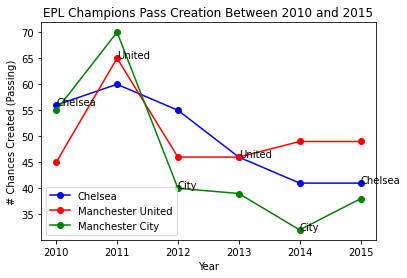

In [39]:
# plot distribution of passing chance creation
x1 = df_Chelsea['date']
x2 = df_M_United['date']
x3 = df_M_City['date']

y1 = df_Chelsea['chanceCreationPassing']
y2 = df_M_United['chanceCreationPassing']
y3 = df_M_City['chanceCreationPassing']

plt.title('EPL Champions Pass Creation Between 2010 and 2015')
plt.xlabel('Year')
plt.ylabel('# Chances Created (Passing)')

Chelsea, = plt.plot(x1, y1, label="Chelsea", marker='o', color='blue')
M_United, = plt.plot(x2, y2, label="Manchester United", marker='o', color='red')
M_City, = plt.plot(x3, y3, label="Manchester City", marker='o', color='green')

#Champion Label
plt.text(0,56,'Chelsea')
plt.text(1,65,'United')
plt.text(2,40,'City')
plt.text(3,46,'United')
plt.text(4,32,'City')
plt.text(5,41,'Chelsea')


leg = plt.legend(loc='lower left')
plt.show()

> For passing chance creation the teams that won the EPL in the 2011, 2012, 2014 and 2015 season weren't at the top of the passing chance creation charts. The seasons 2011, 2012 and 2014 are present once more.

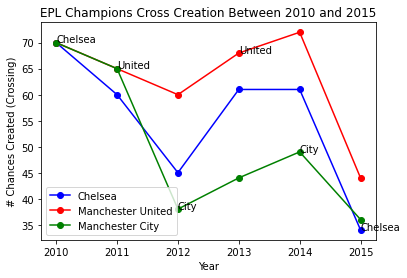

In [40]:
# plot distribution of passing chance creation
x1 = df_Chelsea['date']
x2 = df_M_United['date']
x3 = df_M_City['date']

y1 = df_Chelsea['chanceCreationCrossing']
y2 = df_M_United['chanceCreationCrossing']
y3 = df_M_City['chanceCreationCrossing']

plt.title('EPL Champions Cross Creation Between 2010 and 2015')
plt.xlabel('Year')
plt.ylabel('# Chances Created (Crossing)')

Chelsea, = plt.plot(x1, y1, label="Chelsea", marker='o', color='blue')
M_United, = plt.plot(x2, y2, label="Manchester United", marker='o', color='red')
M_City, = plt.plot(x3, y3, label="Manchester City", marker='o', color='green')

#Champion Label
plt.text(0,70,'Chelsea')
plt.text(1,65,'United')
plt.text(2,38,'City')
plt.text(3,68,'United')
plt.text(4,49,'City')
plt.text(5,34,'Chelsea')


leg = plt.legend(loc='lower left')
plt.show()

> Cross chance creation starts of at a high rate before dropping off for all teams as the seasons progress. In this case the seasons are 2012 and 2014 common in the previous visualizations where the champion doesn't lead the charts.

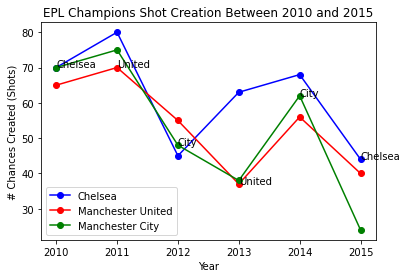

In [41]:
# plot distribution of shooting chance creation
x1 = df_Chelsea['date']
x2 = df_M_United['date']
x3 = df_M_City['date']

y1 = df_Chelsea['chanceCreationShooting']
y2 = df_M_United['chanceCreationShooting']
y3 = df_M_City['chanceCreationShooting']

plt.title('EPL Champions Shot Creation Between 2010 and 2015')
plt.xlabel('Year')
plt.ylabel('# Chances Created (Shots)')

Chelsea, = plt.plot(x1, y1, label="Chelsea", marker='o', color='blue')
M_United, = plt.plot(x2, y2, label="Manchester United", marker='o', color='red')
M_City, = plt.plot(x3, y3, label="Manchester City", marker='o', color='green')

#Champion Label
plt.text(0,70,'Chelsea')
plt.text(1,70,'United')
plt.text(2,48,'City')
plt.text(3,37,'United')
plt.text(4,62,'City')
plt.text(5,44,'Chelsea')


leg = plt.legend(loc='lower left')
plt.show()

> For the seasons 2011, 2012, 2013 and 2014 the champion does not produce the most shot creation chances.

<a id='conclusions'></a>
## Conclusions

> Within all the visualizations the seasons most present are:
 2012 - 4 occurrences
 2014 - 4 occurrences
 
> In the 2012 season the Champion Manchester City only won by goal difference while in the 2014 season the Champion Manchester City once again won narrowly by a 2 point gap. Thus in most cases between 2010 and 2015, the EPL champion is not the leader in either of the team attributes studied, with the seasons 2012 and 2014 showing greater competition towards the winning of the title.

> The limitation to this exploration is that an exact correlation to a teams creative dominance to being a champion isn't a clear, thus leading this exploration to be more speculatory. Since the exploration is focussed on the eventual champions teams that are known to have creative football philosophies aren't represented within this study.